<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/AllModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Manuscript

/content/gdrive/My Drive/Manuscript


In [ ]:
import pickle
from ML_Pipeline.utils import read_data,inspection,null_values, drop_cols
from ML_Pipeline.ml_model import prepare_model_originaldata,all_models
from ML_Pipeline.evaluate_metrics import confusion_matrix,roc_curve, confusion_matrix_plot
# from ML_Pipeline.lime import lime_explanation
import pandas as pd
import matplotlib.pyplot as plt

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

#performance metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef

In [ ]:
# Read the initial datasets
df = read_data("input/ML_dataset.xlsx")

In [ ]:
df.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,HC1,HC,68,M,Healthy,5.07,8.99,88.2,41.7,23.70,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,HC2,HC,73,M,Healthy,3.31,4.16,82.9,84.4,19.90,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,HC3,HC,76,M,Healthy,2.29,4.90,93.3,26.3,6.11,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,HC4,HC,47,M,Healthy,4.96,52.60,66.6,35.2,40.00,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,HC5,HC,49,F,Healthy,1.82,54.00,96.4,24.6,61.70,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546


In [ ]:
df = df.replace({
    "Pathology": {"HC":0, "IBM":1},
    "Sex":{"M":0, "F":1}
    })

##Original data 

In [ ]:
final_report = pd.DataFrame()

In [ ]:
## Exclude columns nor required in cols_to_exclude
X_train, X_test, y_train, y_test = prepare_model_originaldata(df,class_col='Pathology',
                                                              cols_to_exclude=['ID#', 'cN1A status'])

computing GradientBoosting - Original 
computing RandomForestClassifier - Original 
computing XGBClassifier - Original 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type,f1_betascore,95% CI lower bound,95% CI upper bound
0,GradientBoosting,0.472757,0.910714,0.758621,0.916667,0.830189,Original,0.754135,0.799653,0.949986
1,RandomForestClassifier,0.729397,0.937500,0.827586,1.000000,0.905660,Original,0.872932,0.830714,0.952620
2,XGBClassifier,0.599175,0.907738,0.840000,0.875000,0.857143,Original,0.813912,0.769127,0.936285


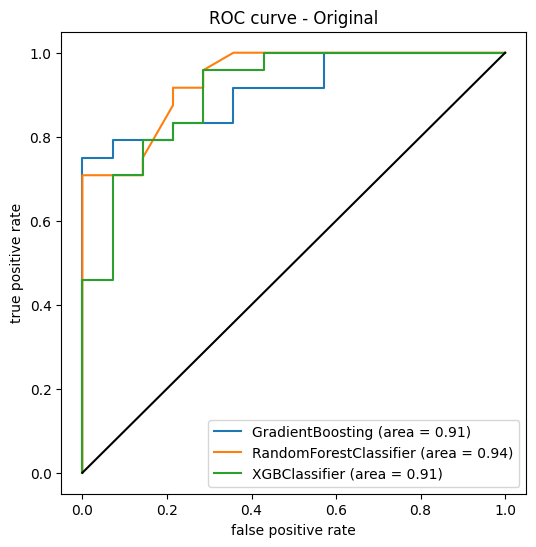

In [ ]:
models_report, conf_matrix = all_models(X_train,y_train,X_test,y_test, 'Original') # change model accordingly
final_report = final_report.append(models_report, ignore_index=True)
models_report

In [ ]:
#Emily Testing
def evaluate(model,xtest,ytest,name):
    
    ypred=model.predict(xtest)
    accuracy=np.round(balanced_accuracy_score(ytest,ypred),4)
    precision=np.round(precision_score(ytest,ypred,average='weighted'),4)
    recall=np.round(recall_score(ytest,ypred,average='weighted'),4)
    f1score=np.round(f1_score(ytest,ypred,average='weighted'),4)
    cohenkappa_score=np.round(cohen_kappa_score(ytest,ypred),4)
    matthews_corrcoef_=no.round(matthews_corrcoef(ytest,ypred),4)
    return accuracy,precision,recall,f1score,cohenkappa_score,matthews_corrcoef_

  

In [ ]:
def fit_data(xtrain,ytrain):
    
    #Gradientboosting
    GB=GradientBoosting()
    GB.fit(xtrain,ytrain)

    #XGBoost Classifier
    XGB=XGBClassifier(num_class=labels.shape,eval_metric='mlogloss',use_label_encoder =False)
    XGB.fit(xtrain,ytrain)
    
    #Random Forest Classifier
    RF=RandomForestClassifier(max_features=0.2)
    RF.fit(xtrain,ytrain)
    
   performance_list[]

   performance_metrics=['accuracy','precision','recall','f1score','cohenkappa_score','matthews_corrcoef_']

   indicies=[]

 #create a dictionary object to store the models
    models={'GB':GB,'Random Forest':RF,'XGBoost':XGB}

    #evaluate each model stored in the dictionary obbject

    for name,model in model_dict.items():
      performance=evaluate(model,xtest,ytest,name)
      performance_list.append(performance)
      indicies.append(name)

      performance_frame=pd.DataFrame(performance_list,columns=performance_metrics,index=indicies)
      return performance_frame

IndentationError: ignored

Confusion Matrix for GradientBoosting :


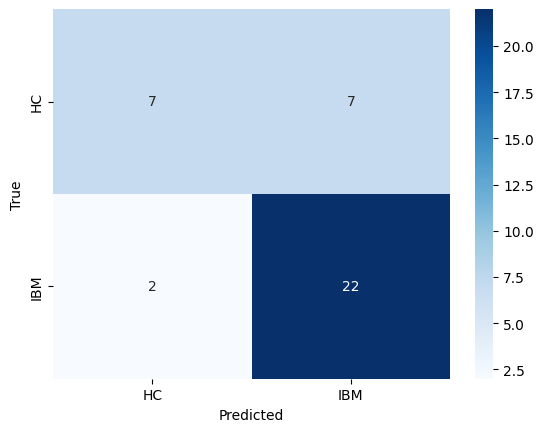



Confusion Matrix for RandomForestClassifier :


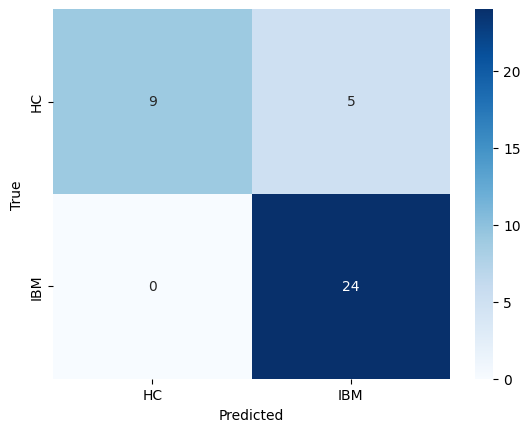



Confusion Matrix for XGBClassifier :


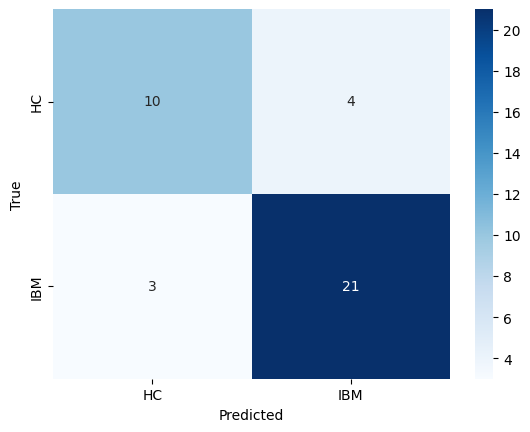

In [ ]:
for name in conf_matrix.keys():
  import seaborn as sns
  print(f"Confusion Matrix for {name} :")
  sns.heatmap(conf_matrix[name],annot=True,cmap="Blues",fmt="g", xticklabels=['HC','IBM'], yticklabels=['HC','IBM'])
  plt.show()
  print('\n')